<a href="https://colab.research.google.com/github/ParhamPishro/Solutions-of-FUM-Academic-Exercises/blob/main/Deep%20Learning/5_N_Rook_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Pytorch For NxN Gradient in Chessboard and Solving N-Rook  Problem


## 1. Installation of Prerequisites  and Libraries.

Here we install pyTorch as main component.
We also use python-chess to handle chessboard creation and print outputs.

In [ ]:
!pip install torch python-chess



## 2. We Solve the Code By Defining a function called solve_n_rooks

In [ ]:
import torch
import torch.optim as optim
import time

def solve_n_rooks(N=8, num_epochs=1000, learning_rate=0.05, display_every=100):
    """
    Solves the N-Rooks problem using PyTorch optimization.

    Parameters:
    - N (int): Size of the chessboard (NxN).
    - num_epochs (int): Number of optimization steps.
    - learning_rate (float): Learning rate for the optimizer.
    - display_every (int): Frequency of displaying the chessboard during optimization.

    Returns:
    - rooks_positions (list of tuples): Final list of (row, col) positions for rooks.
    """
    # Initialize a random NxN matrix with values between 0 and 1
    X = torch.rand(N, N, requires_grad=True)

    # Define the optimizer
    optimizer = optim.Adam([X], lr=learning_rate)

    # Define the loss function
    def loss_function(X):
        # Row constraints: each row should sum to 1
        row_sums = torch.sum(X, dim=1)
        row_loss = torch.sum((row_sums - 1) ** 2)

        # Column constraints: each column should sum to 1
        col_sums = torch.sum(X, dim=0)
        col_loss = torch.sum((col_sums - 1) ** 2)

        # Binary constraints: elements should be close to 0 or 1
        elem_loss = torch.sum(X * (1 - X))

        # Total loss
        loss = row_loss + col_loss + elem_loss
        return loss

    # Optimization loop
    for epoch in range(1, num_epochs + 1):
        optimizer.zero_grad()       # Clear gradients
        loss = loss_function(X)     # Compute loss
        loss.backward()             # Backpropagate
        optimizer.step()            # Update parameters

        # Clamp the values of X to be between 0 and 1
        with torch.no_grad():
            X.clamp_(0, 1)

        # Display progress at specified intervals
        if epoch % display_every == 0 or epoch == num_epochs:
            print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item():.4f}')
            display_board(X, N)

    # Final configuration
    X_binary = X.round()
    rooks_positions = [(i, j) for i in range(N) for j in range(N) if X_binary[i, j].item() == 1]
    return rooks_positions



## 3. We define a function to print board in asci manner to support different sizes of boards.

In [ ]:
def display_board(X, N):
    """
    Displays the current configuration of the board based on matrix X.
    """
    X_binary = X.round()  # Binarize the matrix
    board = [["." for _ in range(N)] for _ in range(N)]

    for i in range(N):
        for j in range(N):
            if X_binary[i, j].item() == 1:
                board[i][j] = "R"  # "R" represents a rook

    for row in board:
        print(" ".join(row))
    print("\n" + "-" * (2 * N - 1))  # Divider between epochs



## 4. We run and test code with our own customized setup to solve optimization problem

In [ ]:
# Parameters
N = 8               # Size of the chessboard (NxN)
num_epochs = 500    # Number of optimization steps
learning_rate = 0.05 # Learning rate for the optimizer
display_every = 5  # Display the board every 'display_every' epochs

# Solve the N-Rooks problem
final_rooks_positions = solve_n_rooks(N=N, num_epochs=num_epochs, learning_rate=learning_rate, display_every=display_every)

# Display final configuration
print("Final Configuration:")
display_board(torch.tensor([[1 if (i, j) in final_rooks_positions else 0 for j in range(N)] for i in range(N)], dtype=torch.float32), N)


Epoch 5/500, Loss: 49.7620
R R R . . . . .
. . R R . R . .
. R . . . . . .
. . R . . . . R
. . . . R . . .
. . . . . . R .
. . R . . . . .
. . R . R R . .

---------------
Epoch 10/500, Loss: 11.4342
R . . . . . . .
. . . . . . . .
. R . . . . . .
. . . . . . . R
. . . . R . . .
. . . . . . R .
. . . . . . . .
. . R . . . . .

---------------
Epoch 15/500, Loss: 6.1733
. . . . . . . .
. . . . . . . .
. R . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .

---------------
Epoch 20/500, Loss: 7.1162
. . . . . . . .
. . . . . . . .
. R . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .

---------------
Epoch 25/500, Loss: 6.9028
. . . . . . . .
. . . . . . . .
. R . . . . . .
. . . . . . . .
. . . . R . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .

---------------
Epoch 30/500, Loss: 5.6828
. . . . . . . .
. . . . . . . .
. R . . . . . .
. . . . . . . .
. . . . R . . .
. . . . . . . .
. . . . . . . .


## 5. We use following to draw chessboards if possible. (Optional)

Since library can't draw chessboards for N > 8 , we limit the usage of draw board function to N <= 8.

In [ ]:

def draw_board(rooks_positions):
    """
    Draws an 8x8 chessboard with rooks placed at given positions.
    """
    import chess
    import chess.svg
    from IPython.display import display, SVG

    board = chess.Board()
    board.clear()  # Clear all pieces to add only rooks

    # Place rooks on the board based on rooks_positions
    for row, col in rooks_positions:
        square = chess.square(col, 7 - row)  # Flip row to fit chess board coordinates
        board.set_piece_at(square, chess.Piece(chess.ROOK, chess.WHITE))

    # Display the board as an SVG
    display(SVG(chess.svg.board(board=board, size=300)))

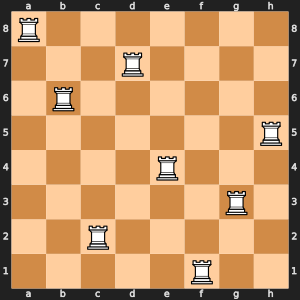

In [ ]:
# Draw the chessboard with rooks using python-chess
if N == 8:
    draw_board(final_rooks_positions)